# Optimización de Modelos Hidrodinámicos para Redes de Acuicultura
*Giamportone, Ariel Lujan* 

*ALG Data&Engineering Solutions*

## Introducción
Este proyecto busca optimizar los modelos hidrodinámicos para redes de acuicultura mediante técnicas de ciencia de datos. La idea es utilizar datos generados sintéticamente para entrenar y evaluar un modelo predictivo que pueda estimar las fuerzas hidrodinámicas sobre diferentes tipos de redes de acuicultura bajo diversas condiciones de flujo.

## Objetivo del Proyecto
Desarrollar un modelo predictivo que estime con precisión las fuerzas hidrodinámicas sobre las redes de acuicultura utilizando datos sintéticos generados con la librería Faker.

## Metodología
Generación de Datos Sintéticos
Preprocesamiento de Datos
Análisis Exploratorio de Datos (EDA)
Desarrollo del Modelo
Optimización del Modelo
Implementación y Visualización
1. Generación de Datos Sintéticos
Para la generación de datos sintéticos, utilizaremos la librería Faker en Python. Esta librería nos permitirá crear un conjunto de datos que simulen las condiciones reales de las redes de acuicultura.


In [54]:
import pandas as pd
import numpy as np
from faker import Faker

# Inicializar Faker
fake = Faker()

# Configuración para reproducibilidad
np.random.seed(42)

# Generar datos falsos
num_samples = 1000
data = {
    'velocidad_corriente': np.random.uniform(0.1, 2.0, num_samples),  # Velocidad de la corriente en m/s
    'fuerza_hidrodinamica': np.random.uniform(10, 500, num_samples),  # Fuerza hidrodinámica en N
    'solidez_red': np.random.uniform(0.1, 0.4, num_samples),  # Solidez de la red
    'diametro_hilo': np.random.uniform(0.5, 5.0, num_samples),  # Diámetro del hilo en mm
    'angulo_entrada': np.random.choice([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], num_samples)  # Ángulo de entrada
}

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame para usar en el dashboard
df.to_csv('data.csv', index=False)

# Mostrar los primeros registros para verificar
df.head()

,velocidad_corriente,fuerza_hidrodinamica,solidez_red,diametro_hilo,angulo_entrada
0,0.811626,100.715135,0.178512,3.527163,90
1,1.906357,275.531464,0.174094,4.085066,40
2,1.490788,437.743460,0.371876,1.627106,40
3,1.237451,368.790194,0.174864,3.311933,60
4,0.396435,405.214962,0.181585,3.072857,30


2. Preprocesamiento de Datos
Transformar y normalizar los datos para prepararlos para el modelo de aprendizaje automático.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División de los datos en características (X) y etiquetas (y)
X = df[['velocidad_corriente', 'angulo_entrada', 'solidez_red', 'diametro_hilo']]
y = df['fuerza_hidrodinamica']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Análisis Exploratorio de Datos (EDA)
Realizar un análisis exploratorio para entender mejor las características y distribuciones de los datos.


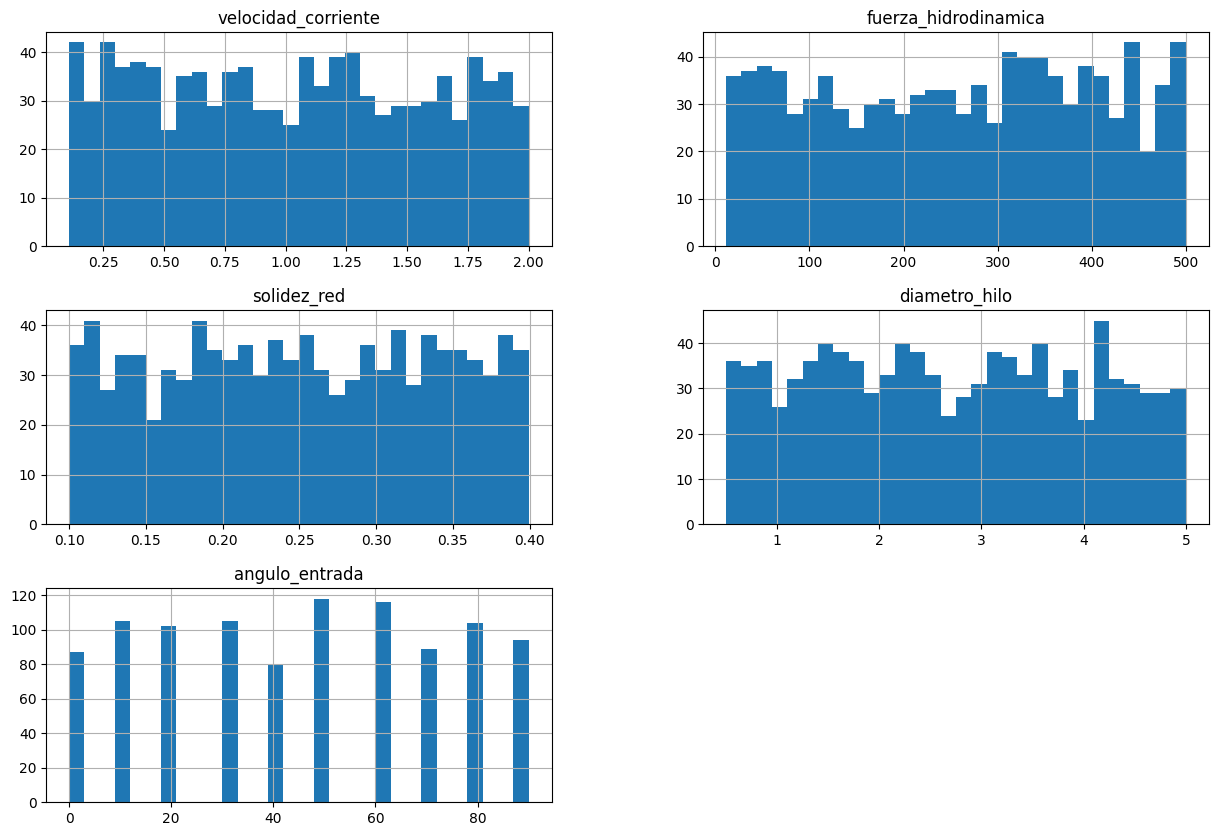

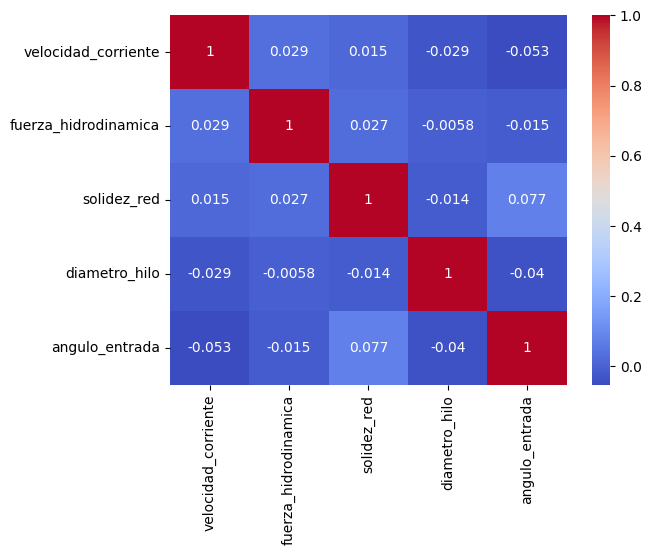

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de las variables
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

4. Desarrollo del Modelo
Entrenar un modelo de regresión lineal para predecir las fuerzas hidrodinámicas.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicción
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 144.09649937408653
R²: -0.019661453884783686


5. Optimización del Modelo
Uso de técnicas avanzadas para optimizar el modelo, como Grid Search para encontrar los mejores hiperparámetros.
Explicación
Pipeline: Se crea un pipeline que primero normaliza los datos usando StandardScaler y luego aplica el modelo LinearRegression.

**Parámetros de Grid Search:** Los parámetros a buscar se modifican para que correspondan con los parámetros válidos de LinearRegression. Aquí hemos utilizado fit_intercept y copy_X.

**Entrenamiento y Evaluación:** El mejor modelo se selecciona basado en la búsqueda de hiperparámetros y se evalúa utilizando los datos de prueba.
Código para Optimización del Modelo

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definición del pipeline que incluye la normalización
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Definición de los parámetros para Grid Search
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Entrenamiento del mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluación del mejor modelo
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
print(f'RMSE (Mejor Modelo): {rmse_best}')
print(f'R² (Mejor Modelo): {r2_best}')

Mejores parámetros: {'regressor__copy_X': True, 'regressor__fit_intercept': True}
RMSE (Mejor Modelo): 144.09649937408653
R² (Mejor Modelo): -0.019661453884783686


6. Implementación y Visualización
Crear un dashboard interactivo para visualizar las predicciones y los datos experimentales.


In [59]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

# Cargar los datos
df = pd.read_csv('data.csv')

# Inicializar Dash
app = dash.Dash(__name__)

# Layout del Dashboard
app.layout = html.Div([
    html.H1("Predicción de Fuerzas Hidrodinámicas en Redes de Acuicultura"),
    dcc.Graph(id='scatter-plot'),
    dcc.Slider(
        id='angulo-slider',
        min=0,
        max=90,
        step=1,
        value=45,
        marks={i: f'{i}°' for i in range(0, 91, 10)},
        tooltip={"placement": "bottom", "always_visible": True}
    )
])

# Callback para actualizar el gráfico
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('angulo-slider', 'value')]
)
def update_figure(selected_angle):
    try:
        angles = df['angulo_entrada'].unique()

        if selected_angle in angles:
            filtered_df = df[df['angulo_entrada'] == selected_angle]
        else:
            # Interpolar los datos
            grid_x, grid_y = np.mgrid[min(df['velocidad_corriente']):max(df['velocidad_corriente']):100j, 
                                      min(df['solidez_red']):max(df['solidez_red']):100j]
            grid_z = griddata((df['velocidad_corriente'], df['solidez_red']), df['fuerza_hidrodinamica'], (grid_x, grid_y), method='linear')
            
            interpolated_df = pd.DataFrame({
                'velocidad_corriente': grid_x.flatten(),
                'solidez_red': grid_y.flatten(),
                'fuerza_hidrodinamica': grid_z.flatten()
            })
            
            interpolated_df = interpolated_df.dropna()
            interpolated_df['angulo_entrada'] = selected_angle
            filtered_df = interpolated_df

        fig = px.scatter(filtered_df, x='velocidad_corriente', y='fuerza_hidrodinamica', color='solidez_red',
                         size='diametro_hilo', hover_name='angulo_entrada', 
                         labels={'velocidad_corriente': 'Velocidad de la Corriente (m/s)',
                                 'fuerza_hidrodinamica': 'Fuerza Hidrodinámica (N)',
                                 'solidez_red': 'Solidez de la Red',
                                 'diametro_hilo': 'Diámetro del Hilo (mm)'})
        fig.update_layout(title=f'Fuerzas Hidrodinámicas para Ángulo de Entrada {selected_angle}°')
        return fig

    except Exception as e:
        print(f"Error updating figure: {e}")
        return dash.no_update

# Ejecutar el servidor
if __name__ == '__main__':
    app.run_server(debug=True)